In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

df = pd.read_csv(r"working_data\separated_cols.csv")
df_unique = pd.read_csv(r"working_data\unique_counts.csv")

In [3]:
f=lambda x: int(x)+int((x-int(x))*4)/4 if not math.isnan(x) else x
df_w=df[["DATE_OCCURED", "CRIME_TYPE"]].copy()
df_w["DATE_OCCURED"]=df_w["DATE_OCCURED"].apply(f)

di= {}
y = []
x=np.array(range(2010*4,2022*4+1,1))/4
for d in x:
    count=df_w.loc[df_w["DATE_OCCURED"]==d].value_counts()
    y.append({c[0][1]: c[1] for c in count.items()})
    for c in count.items(): di[c[0][1]]=0
di=list(di.keys())

y=[[(d.get(c) if d.get(c) is not None else 0) for c in di] for d in y]

Text(0.5, 1.0, 'change of crime count for all types of crimes')

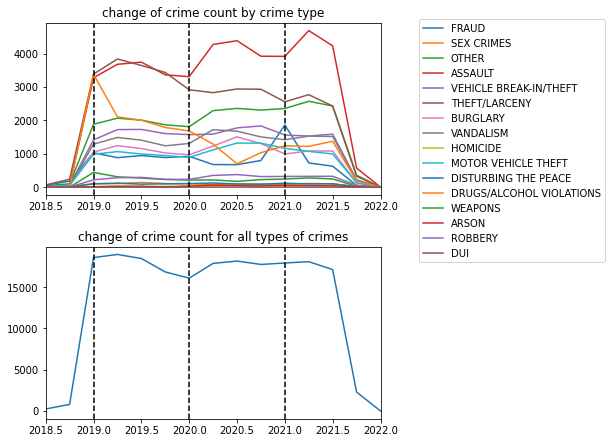

In [4]:
# x,y=list(zip(*sorted(zip(count.keys(),count.values()), key= lambda x: x[0])))
fig, (ax1, ax2) = plt.subplots(2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=1.5, wspace=None, hspace=0.3)

ax1.plot(x,y)
ax1.set_xlim([2018.5,2022])
for c in range(int(x[0]),int(x[-1])):
    ax1.axvline(c, color='k', linestyle='--')
ax1.legend(di, bbox_to_anchor=(1.1, 1.05))
ax1.set_title("change of crime count by crime type")

ax2.plot(x,[len(df_w.loc[df_w["DATE_OCCURED"]==d]) for d in x])
for c in range(int(x[0]),int(x[-1])):
    ax2.axvline(c, color='k', linestyle='--')
ax2.set_xlim([2018.5,2022])
ax2.set_title('change of crime count for all types of crimes')


In [5]:
f=lambda x: int(x)+int((x-int(x))*4)/4 if not math.isnan(x) else x
df_w=df[["DATE_OCCURED", "ZIP_CODE"]].copy()
df_w["DATE_OCCURED"]=df_w["DATE_OCCURED"].apply(f)

di = df_unique["ZIP_CODE"].dropna().apply(lambda x: x if type(x) is not str else eval(x))
di = [c[0] for c in di.values if c[1]>6]

y = []
x=np.array(range(2010*4,2022*4+1,1))/4
for d in x:
    count=df_w.loc[df_w["DATE_OCCURED"]==d].value_counts()
    y.append({c[0][1]: c[1] for c in count.items()})

y=np.array([[(d.get(c) if d.get(c) is not None else 0) for c in di] for d in y])

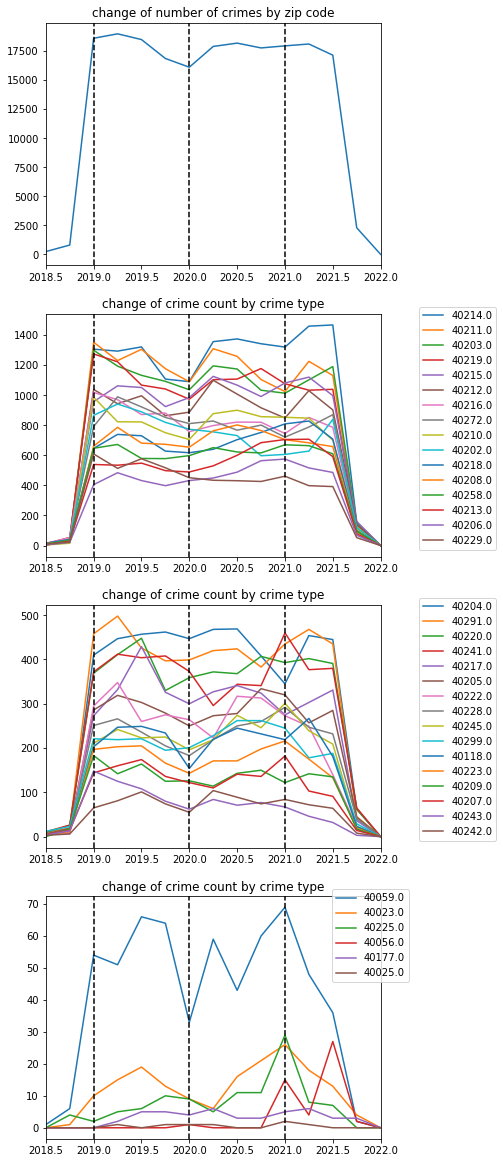

In [6]:
seg=3
fig, ax = plt.subplots(seg+1)
plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=4, wspace=None, hspace=0.2)

ax[0].plot(x,[len(df_w.loc[df_w["DATE_OCCURED"]==d]) for d in x])
for c in range(int(x[0]),int(x[-1])):
    ax[0].axvline(c, color='k', linestyle='--')
ax[0].set_xlim([2018.5,2022])
ax[0].set_title('change of number of crimes by zip code')

for i in range(1,seg+1):
    a = (i-1)*int(len(y)/seg)
    b = i*int(len(y)/seg) if i!=seg else len(y)
    ax[i].plot(x,y[:,a:b])
    ax[i].set_xlim([2018.5,2022])
    for c in range(int(x[0]),int(x[-1])):
        ax[i].axvline(c, color='k', linestyle='--')
    ax[i].legend(di[a:b], bbox_to_anchor=(1.1, 1.05))
    ax[i].set_title("change of crime count by crime type")



Text(0.5, 1.0, 'attempted or completed by crime type')

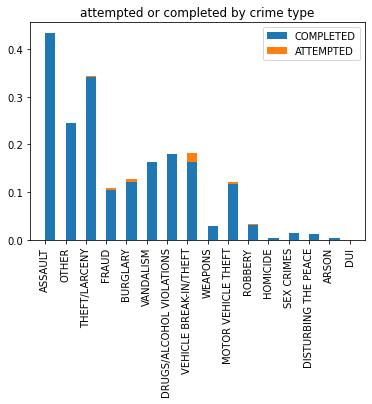

In [7]:
df_w=[df.loc[df["ATT_COMP"]==eval(a)[0]]["CRIME_TYPE"].values
        for a in df_unique["ATT_COMP"].dropna()]

plt.figure()
plt.hist(df_w, stacked=True, density=True, bins=30)
plt.xticks(rotation=90)
plt.legend(['COMPLETED','ATTEMPTED'])
plt.title('attempted or completed by crime type')

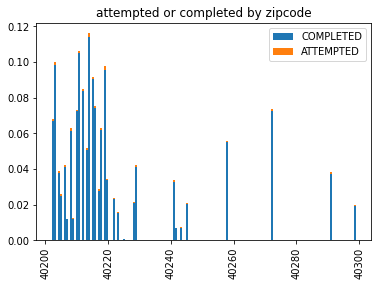

In [8]:
df_w=[
    df.loc[40200<=df["ZIP_CODE"]].loc[df["ZIP_CODE"]<=40300].loc[df["ATT_COMP"]==eval(a)[0]]["ZIP_CODE"].values
        for a in df_unique["ATT_COMP"].dropna()
]

plt.figure()
plt.hist(df_w, stacked=True, density=True, bins=150)
plt.xticks(rotation=90)
plt.legend(['COMPLETED','ATTEMPTED'])
plt.title('attempted or completed by zipcode')
plt.show()

In [9]:
f=lambda x: int(x)+int((x-int(x))*20)/20 if not math.isnan(x) else x
df_w=df[["Time_occurred", "CRIME_TYPE"]].copy()
df_w["Time_occurred"]=df_w["Time_occurred"].apply(f)

di = df_unique["CRIME_TYPE"].dropna()\
    .apply(lambda x: x if type(x) is not str else eval(x))
di = [c[0] for c in di.values]

y = []
x = sorted(df_unique["Time_occurred"].dropna()\
    .apply(lambda x: x if type(x) is not str else eval(x)[0]).values)

for d in x:
    count=df_w.loc[df_w["Time_occurred"]==d]['CRIME_TYPE'].value_counts()
    y.append(count)


y=np.array([[(d.get(c) if d.get(c) is not None else 0) for c in di] for d in y])

Text(0.5, 1.0, 'change of crime count for all types of crimes during the day')

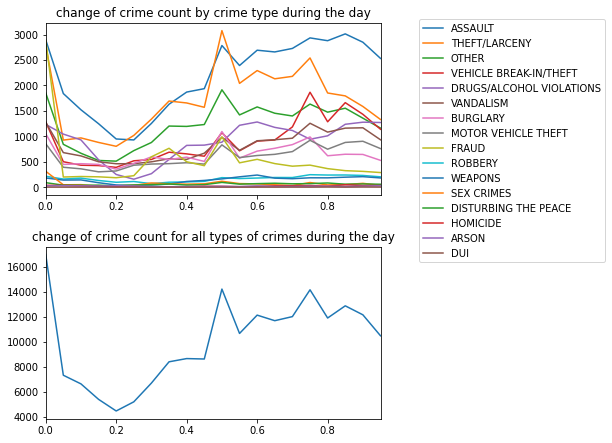

In [10]:
fig, (ax1, ax2) = plt.subplots(2)
plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=1.5, wspace=None, hspace=0.3)

ax1.plot(x,y)
ax1.set_xlim([min(x),max(x)])
for c in range(int(x[0]),int(x[-1])):
    ax1.axvline(c, color='k', linestyle='--')
ax1.legend(di, bbox_to_anchor=(1.1, 1.05))
ax1.set_title("change of crime count by crime type during the day")

ax2.plot(x,[len(df_w.loc[df_w["Time_occurred"]==d]) for d in x])
for c in range(int(x[0]),int(x[-1])):
    ax2.axvline(c, color='k', linestyle='--')
ax2.set_xlim([min(x),max(x)])
ax2.set_title('change of crime count for all types of crimes during the day')

In [11]:
f=lambda x: int(x)+int((x-int(x))*20)/20 if not math.isnan(x) else x
df_w=df[["Time_occurred", "ZIP_CODE"]].copy()
df_w["Time_occurred"]=df_w["Time_occurred"].apply(f)

di = df_unique["ZIP_CODE"].dropna()\
    .apply(lambda x: x if type(x) is not str else eval(x))
di = [c[0] for c in di.values]

y = []
x = sorted(df_unique["Time_occurred"].dropna()\
    .apply(lambda x: x if type(x) is not str else eval(x)[0]).values)

for d in x:
    count=df_w.loc[df_w["Time_occurred"]==d]['ZIP_CODE'].value_counts()
    y.append(count)


y=np.array([[(d.get(c) if d.get(c) is not None else 0) for c in di] for d in y])

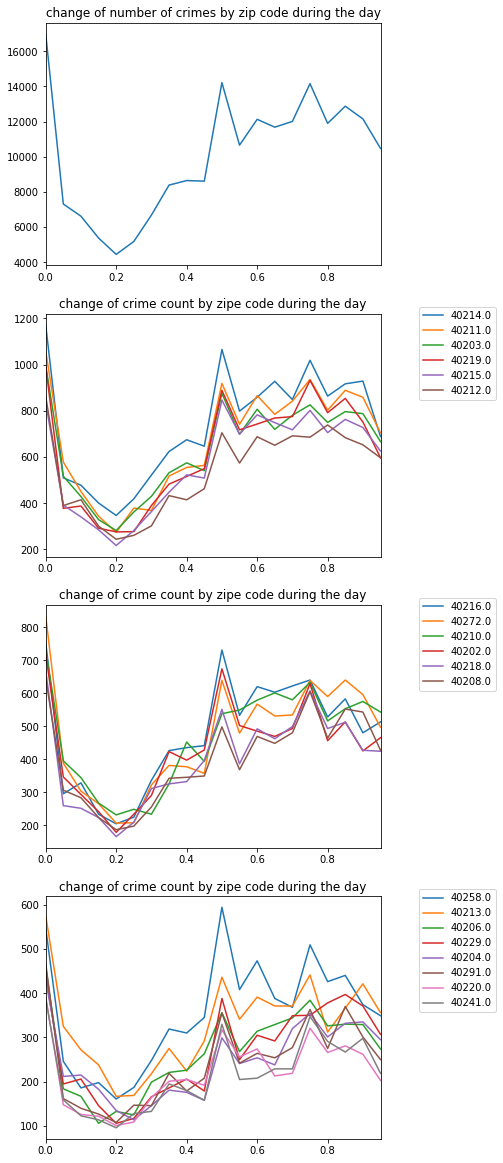

In [12]:
seg=3
fig, ax = plt.subplots(seg+1)
plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=4, wspace=None, hspace=0.2)

ax[0].plot(x,[len(df_w.loc[df_w["Time_occurred"]==d]) for d in x])
for c in range(int(x[0]),int(x[-1])):
    ax[0].axvline(c, color='k', linestyle='--')
ax[0].set_xlim([min(x),max(x)])
ax[0].set_title('change of number of crimes by zip code during the day')

for i in range(1,seg+1):
    a = (i-1)*int(len(y)/seg)
    b = i*int(len(y)/seg) if i!=seg else len(y)
    ax[i].plot(x,y[:,a:b])
    ax[i].set_xlim([min(x),max(x)])
    for c in range(int(x[0]),int(x[-1])):
        ax[i].axvline(c, color='k', linestyle='--')
    ax[i].legend(di[a:b], bbox_to_anchor=(1.1, 1.05))
    ax[i].set_title("change of crime count by zipe code during the day")


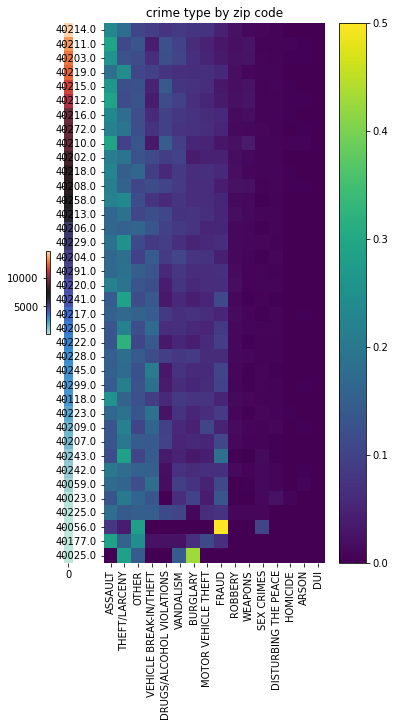

In [13]:
df_w=df[["CRIME_TYPE", "ZIP_CODE"]].copy()
c_t = df_unique["CRIME_TYPE"].dropna()\
           .apply(lambda x: x if type(x) is not str else eval(x)[0]).values
z_c = df_unique["ZIP_CODE"].apply(lambda x: None if type(x)
                is not str or eval(x)[1]<7 else eval(x)[0]).dropna().values

a=[]
b=[]
for zipcode in z_c:
    a.append([])
    df_ww=df_w.loc[df_w["ZIP_CODE"]==zipcode]['CRIME_TYPE']
    b.append([len(df_ww)])
    count=df_ww.value_counts()
    for crime in c_t:
        a[-1].append(count.get(crime)/len(df_ww) if count.get(crime) is not None else 0)

fig, (ax1,ax2) = plt.subplots(ncols=2, gridspec_kw={"width_ratios" : [1,10]})

plt.subplots_adjust(left=None, bottom=None, right=None, top=2, wspace=None, hspace=None)
sns.heatmap(b, cmap="icefire", ax=ax1, cbar=False)
ax1.tick_params(axis='y',label1On=False)
fig.colorbar(ax1.collections[0], ax=ax1,location="left", use_gridspec=False, pad=0.5)

sns.heatmap(a, cbar=False, xticklabels=c_t, yticklabels=z_c, ax=ax2)
plt.colorbar(plt.pcolor(a))
ax2.tick_params(axis='x', rotation=90)
ax2.set_title("crime type by zip code")

plt.show()

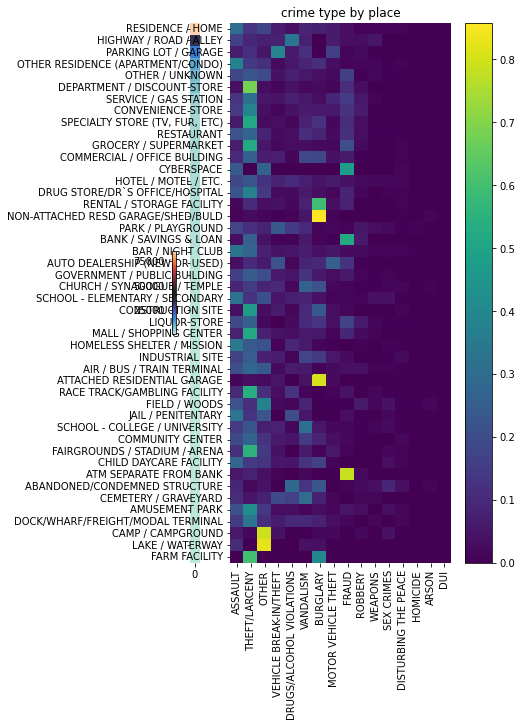

In [14]:
df_w=df[["CRIME_TYPE", "PREMISE_TYPE"]].copy()
c_t = df_unique["CRIME_TYPE"].dropna()\
           .apply(lambda x: x if type(x) is not str else eval(x)[0]).values
z_c = df_unique["PREMISE_TYPE"].apply(lambda x: None if type(x)
                is not str or eval(x)[1]<10 else eval(x)[0]).dropna().values

a=[]
b=[]
for zipcode in z_c:
    a.append([])
    df_ww=df_w.loc[df_w["PREMISE_TYPE"]==zipcode]['CRIME_TYPE']
    b.append([len(df_ww)])
    count=df_ww.value_counts()
    for crime in c_t:
        a[-1].append(count.get(crime)/len(df_ww) if count.get(crime) is not None else 0)

fig, (ax1,ax2) = plt.subplots(ncols=2, gridspec_kw={"width_ratios" : [1,10]})

plt.subplots_adjust(left=None, bottom=None, right=None, top=2, wspace=None, hspace=None)
sns.heatmap(b, cmap="icefire", ax=ax1, cbar=False)
ax1.tick_params(axis='y',label1On=False)
fig.colorbar(ax1.collections[0], ax=ax1,location="left", use_gridspec=False, pad=0.5)

sns.heatmap(a, cbar=False, xticklabels=c_t, yticklabels=z_c, ax=ax2)
plt.colorbar(plt.pcolor(a))
ax2.tick_params(axis='x', rotation=90)
ax2.set_title("crime type by place")

plt.show()

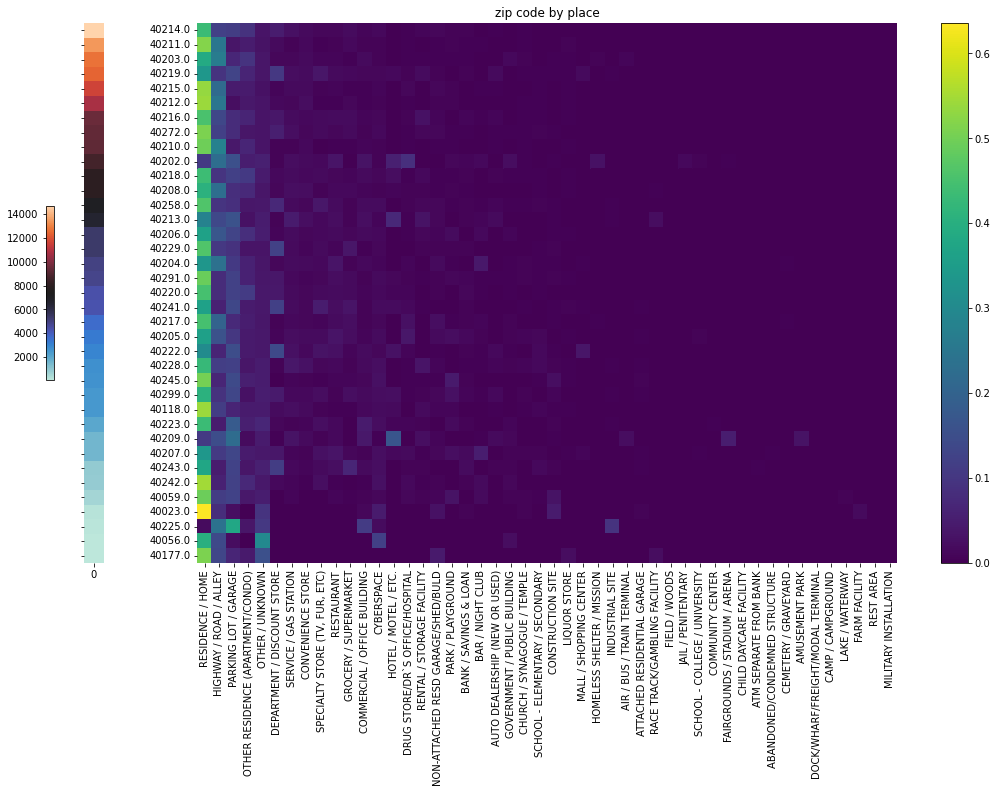

In [15]:
df_w=df[["PREMISE_TYPE", "ZIP_CODE"]].copy()
c_t = df_unique["PREMISE_TYPE"].dropna()\
           .apply(lambda x: x if type(x) is not str else eval(x)[0]).values
z_c = df_unique["ZIP_CODE"].apply(lambda x: None if type(x)
                is not str or eval(x)[1]<10 else eval(x)[0]).dropna().values

a=[]
b=[]
for zipcode in z_c:
    a.append([])
    df_ww=df_w.loc[df_w["ZIP_CODE"]==zipcode]['PREMISE_TYPE']
    b.append([len(df_ww)])
    count=df_ww.value_counts()
    for crime in c_t:
        a[-1].append(count.get(crime)/len(df_ww) if count.get(crime) is not None else 0)

fig, (ax1,ax2) = plt.subplots(ncols=2, gridspec_kw={"width_ratios" : [1,15]})

plt.subplots_adjust(left=None, bottom=None, right=2.5, top=2, wspace=None, hspace=None)
sns.heatmap(b, cmap="icefire", ax=ax1, cbar=False)
ax1.tick_params(axis='y',label1On=False)
fig.colorbar(ax1.collections[0], ax=ax1,location="left", use_gridspec=False, pad=0.5)

sns.heatmap(a, cbar=False, xticklabels=c_t, yticklabels=z_c, ax=ax2)
plt.colorbar(plt.pcolor(a))
ax2.tick_params(axis='x', rotation=90)
ax2.set_title("zip code by place")

plt.show()

Text(0.5, 1.0, 'attempted or completed by place')

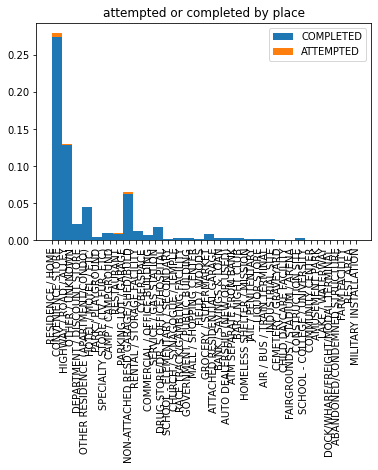

In [16]:
df_w=[df.loc[df["ATT_COMP"]==eval(a)[0]]["PREMISE_TYPE"].dropna().values
        for a in df_unique["ATT_COMP"].dropna()]

plt.figure()
plt.hist(df_w, stacked=True, density=True, bins=30)
plt.xticks(rotation=90)
plt.legend(['COMPLETED','ATTEMPTED'])
plt.title('attempted or completed by place')

In [3]:
f=lambda x: int(x)+int((x-int(x))*20)/20 if not math.isnan(x) else x
df_w=df[["Time_occurred", "PREMISE_TYPE"]].copy()
df_w["Time_occurred"]=df_w["Time_occurred"].apply(f)

di = df_unique["PREMISE_TYPE"].dropna()\
    .apply(lambda x: x if type(x) is not str else eval(x))
di = [c[0] for c in di.values]

y = []
x = sorted(df_unique["Time_occurred"].dropna()\
    .apply(lambda x: x if type(x) is not str else eval(x)[0]).values)

for d in x:
    count=df_w.loc[df_w["Time_occurred"]==d]['PREMISE_TYPE'].value_counts()
    y.append(count)


y=np.array([[(d.get(c) if d.get(c) is not None else 0) for c in di] for d in y])

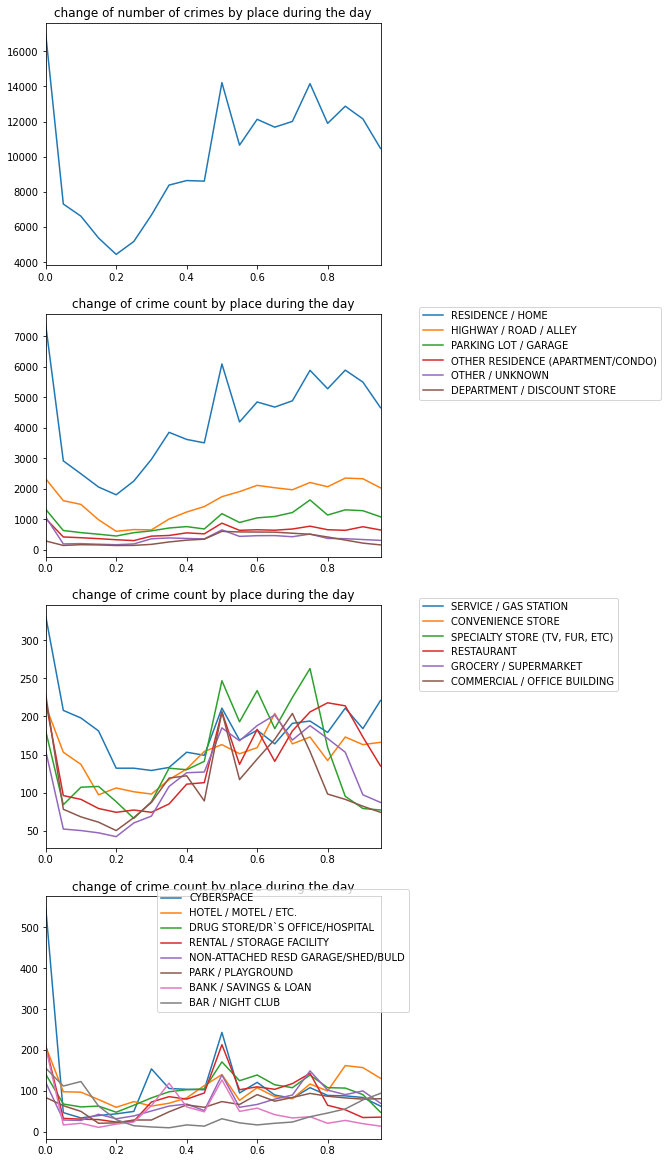

In [6]:
seg=3
fig, ax = plt.subplots(seg+1)
plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=4, wspace=None, hspace=0.2)

ax[0].plot(x,[len(df_w.loc[df_w["Time_occurred"]==d]) for d in x])
for c in range(int(x[0]),int(x[-1])):
    ax[0].axvline(c, color='k', linestyle='--')
ax[0].set_xlim([min(x),max(x)])
ax[0].set_title('change of number of crimes by place during the day')

for i in range(1,seg+1):
    a = (i-1)*int(len(y)/seg)
    b = i*int(len(y)/seg) if i!=seg else len(y)
    ax[i].plot(x,y[:,a:b])
    ax[i].set_xlim([min(x),max(x)])
    for c in range(int(x[0]),int(x[-1])):
        ax[i].axvline(c, color='k', linestyle='--')
    ax[i].legend(di[a:b], bbox_to_anchor=(1.1, 1.05))
    ax[i].set_title("change of crime count by place during the day")

In [19]:
f=lambda x: int(x)+int((x-int(x))*4)/4 if not math.isnan(x) else x
df_w=df[["DATE_OCCURED", "PREMISE_TYPE"]].copy()
df_w["DATE_OCCURED"]=df_w["DATE_OCCURED"].apply(f)

di = df_unique["PREMISE_TYPE"].dropna().apply(lambda x: x if type(x) is not str else eval(x))
di = [c[0] for c in di.values if c[1]>6]

y = []
x=np.array(range(2010*4,2022*4+1,1))/4
for d in x:
    count=df_w.loc[df_w["DATE_OCCURED"]==d].value_counts()
    y.append({c[0][1]: c[1] for c in count.items()})

y=np.array([[(d.get(c) if d.get(c) is not None else 0) for c in di] for d in y])

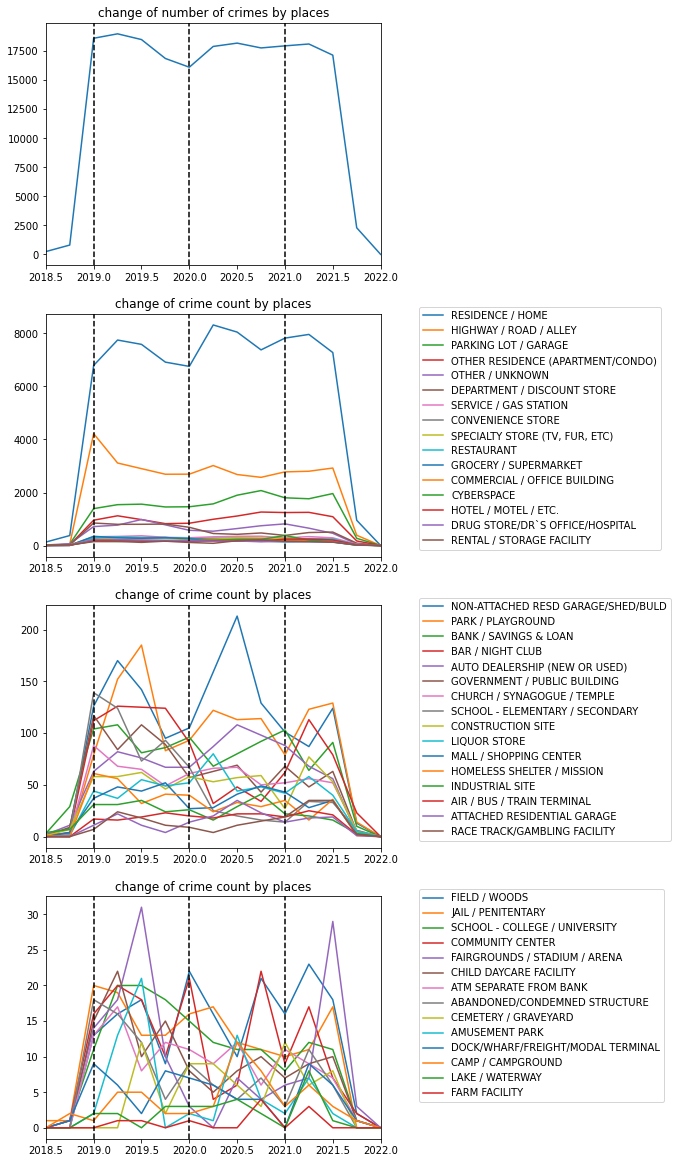

In [20]:
seg=3
fig, ax = plt.subplots(seg+1)
plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=4, wspace=None, hspace=0.2)

ax[0].plot(x,[len(df_w.loc[df_w["DATE_OCCURED"]==d]) for d in x])
for c in range(int(x[0]),int(x[-1])):
    ax[0].axvline(c, color='k', linestyle='--')
ax[0].set_xlim([2018.5,2022])
ax[0].set_title('change of number of crimes by places')

for i in range(1,seg+1):
    a = (i-1)*int(len(y)/seg)
    b = i*int(len(y)/seg) if i!=seg else len(y)
    ax[i].plot(x,y[:,a:b])
    ax[i].set_xlim([2018.5,2022])
    for c in range(int(x[0]),int(x[-1])):
        ax[i].axvline(c, color='k', linestyle='--')
    ax[i].legend(di[a:b], bbox_to_anchor=(1.1, 1.05))
    ax[i].set_title("change of crime count by places")


In [2]:
f=lambda x: int(x)+int((x-int(x))*500)/500 if not math.isnan(x) else x
df_w=df[["DATE_OCCURED","DATE_REPORTED", "CRIME_TYPE"]].copy()
df_w["DATE_diff"]=(df_w["DATE_REPORTED"]-df_w["DATE_OCCURED"]).apply(f)

di = df_unique["CRIME_TYPE"].dropna()\
    .apply(lambda x: x if type(x) is not str else eval(x))
di_c = {c[0]: c[1] for c in di.values}
di = [c[0] for c in di.values]

y = []
x = sorted(list(df_w["DATE_diff"].dropna().value_counts().items()), key=lambda x: x[0])
x=np.array(x)[:,0]
for d in x:
    count=df_w.loc[df_w["DATE_diff"]==d]['CRIME_TYPE'].value_counts()
    y.append(count)


y=np.array([[(d.get(c)/di_c[c] if d.get(c) is not None else 0) for c in di] for d in y])

Text(0.5, 1.0, '% of each crimes that get reported after x years (0.01 year is 3.5 days)')

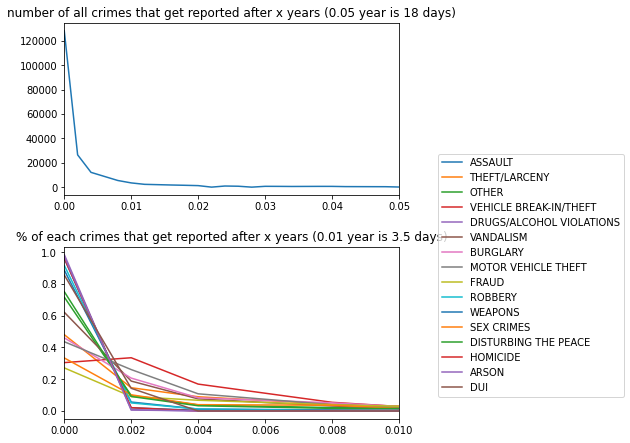

In [12]:
fig, (ax1, ax2) = plt.subplots(2)
plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=1.5, wspace=None, hspace=0.3)

ax1.plot(x,[len(df_w.loc[df_w["DATE_diff"]==d]) for d in x])
ax1.set_xlim([0,0.05])
ax1.set_title('number of all crimes that get reported after x years (0.05 year is 18 days)')

ax2.plot(x,y)
ax2.set_xlim([0,0.01])
ax2.legend(di, bbox_to_anchor=(1.1, 0.1))
ax2.set_title("% of each crimes that get reported after x years (0.01 year is 3.5 days)")

In [43]:
df_w=pd.read_csv("working_data\\normality_chart.csv")
def f(x):
    b=(0,0)
    for a in x:
        if type(a) is not str: continue
        b=tuple(map(sum, zip(eval(a), b)))
    return (b[0]/len(x),b[1]/len(x))
print("D’Agostino and Pearson test results (k2, p)")
df_w.apply(f)[["DATE_REPORTED", "DATE_OCCURED", "ZIP_CODE", "Time_reported", "Time_occurred"]]


D’Agostino and Pearson test results (k2, p)


,DATE_REPORTED,DATE_OCCURED,ZIP_CODE,Time_reported,Time_occurred
0,1.631308e+02,157.454611,9.430088e+01,57.011350,54.878254
1,2.585490e-09,0.012716,1.840919e-08,0.000003,0.000005
